# 03 Data Outliers

Importing libraries.

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import IsolationForest

Reading files.

In [2]:
data = pd.read_csv('../01_data/clean_data.csv').iloc[:,1:]

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,subject_id,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e,atopic_derm_start,atopic_derm_end,allergic_rhinitis_start,allergic_rhinitis_end,asthma_start,asthma_end,first_asthmarx,last_asthmarx,num_asthmarx
0,1,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,12.262834,18.880219,2.0
2,3,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1,4.884326,NaN,3.917864,6.157426,5.127995,NaN,1.404517,6.157426,4.0
3,4,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 \
 \
Creating x dataset.

In [4]:
x = data.iloc[:,1:-9]
x

,birth_year,age_start_years,age_end_years,shellfish_start,shellfish_end,fish_start,fish_end,milk_start,milk_end,soy_start,soy_end,egg_start,egg_end,wheat_start,wheat_end,peanut_start,peanut_end,sesame_start,sesame_end,nut_start,nut_end,nut_c_s,nut_c_e,allerg_c_s,allerg_c_e
0,2006,0.093087,3.164956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
1,1994,12.232717,18.880219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2,2006,0.010951,6.726899,NaN,NaN,NaN,NaN,1.002053,1.002053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,1
3,2004,2.398357,9.111567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
4,2006,0.013689,6.193018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333170,2006,0.736482,7.449692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333171,2006,0.019165,6.984257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333172,2006,0.443532,7.405886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
333173,2006,0.013689,7.017112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0


 \
 \
Box-Plotting x.

In [5]:
%%writefile -a functions.py

def plot_boxplot(df):
    '''Function to plot boxplots for dataframe:
    2 columns, n rows (number of columns of dataframe) '''
     
    col_names = list(df)
    
    plt_size = math.ceil(len(col_names)/2)  #define rows in subplot
    n = 0 #counter to attribute position for plot
    
    #loop to attribute positions in rows and columns
    col_num = [] 
    row_num = []
    for i1 in [0,1]:
        for i2 in list(range(0,plt_size)):
            col_num.append(i1)
            row_num.append(i2)
       
    fig, ax = plt.subplots(plt_size,2, figsize=(10,30))
    
    #loop to plot boxplots
    for i in col_names:
        sns.boxplot(data = df[i], orient = 'h', color='#a1c9f4', ax = ax[row_num[n],col_num[n]])
        ax[row_num[n],col_num[n]].set_ylabel(i)
        n += 1
                                                        
    plt.show()

In [6]:
%run functions.py

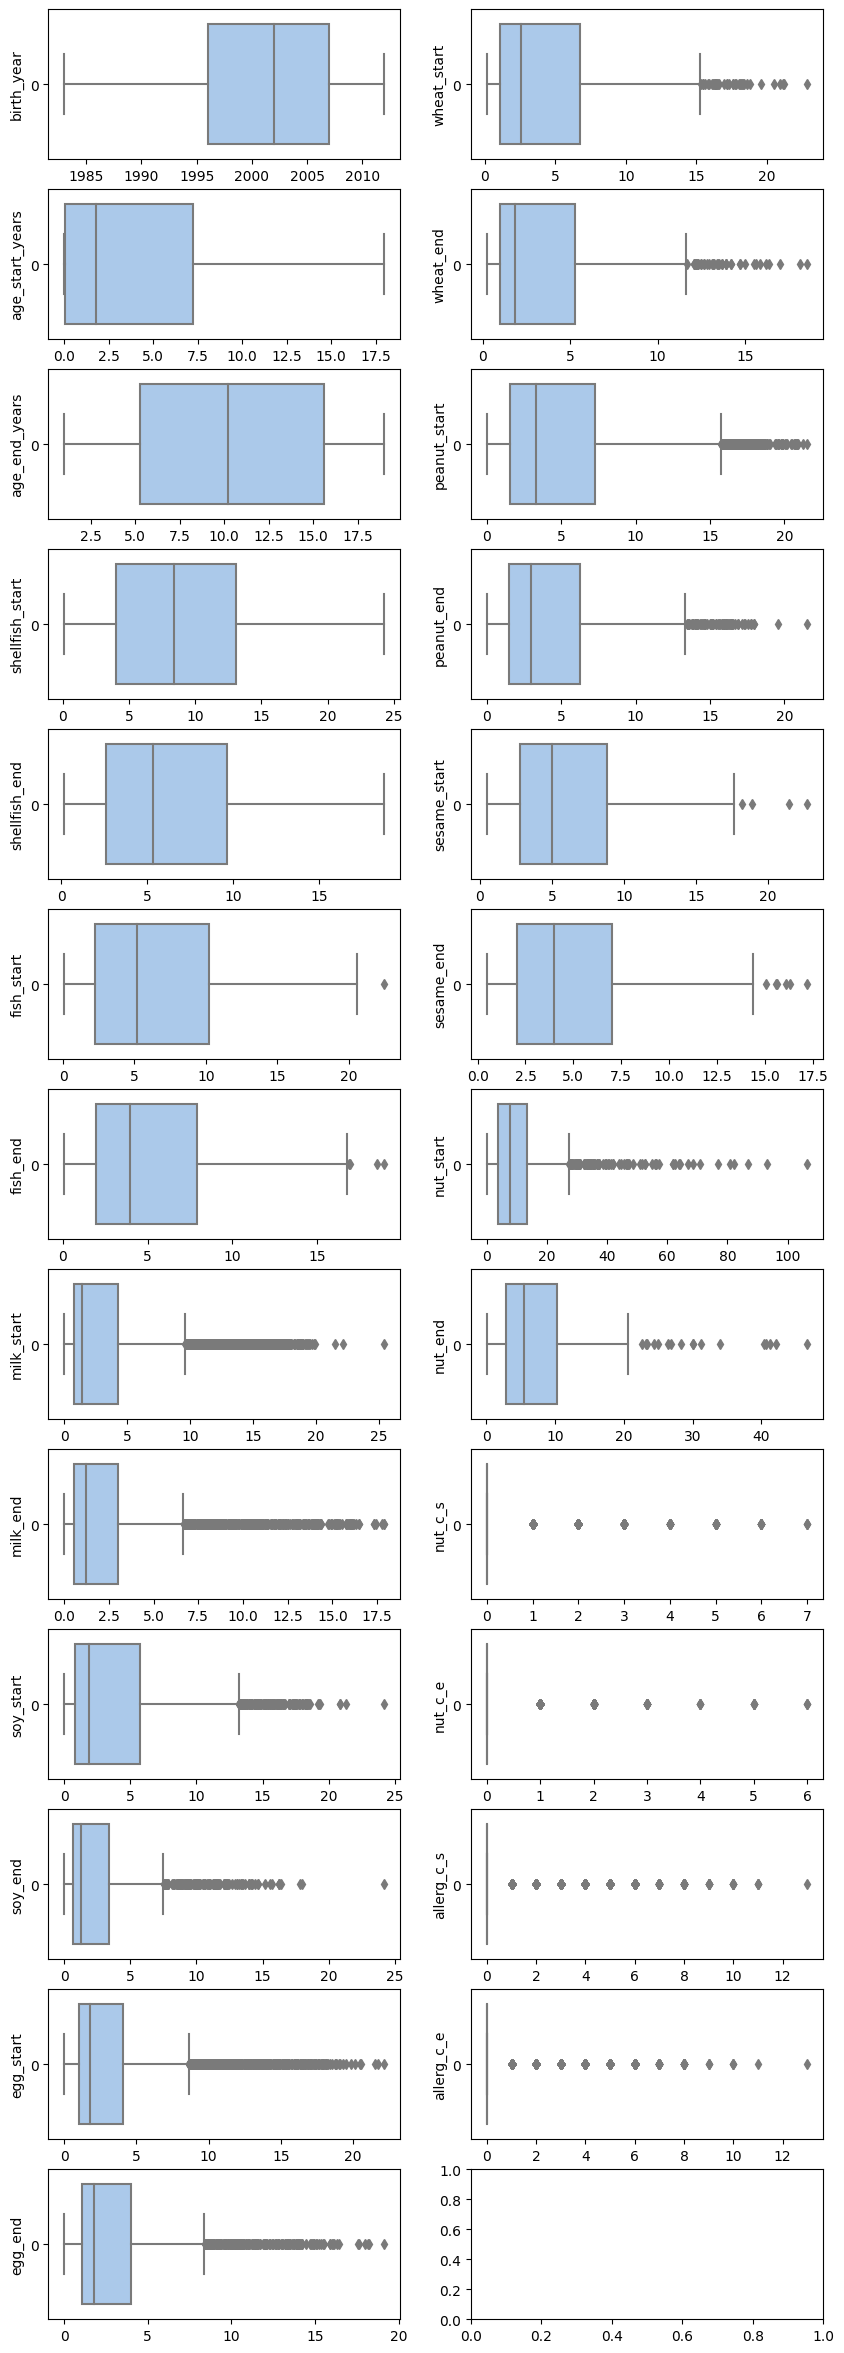

In [7]:
plot_boxplot(x)

 \
 \
Outliers can be seen in box-plots.

## Determining outliers based on mean and standard deviation.

In [8]:
%%writefile -a functions.py

def remove_outliers(df):
    '''function to remove outliers outside of 3x standard deviation'''
    
    df_copy = df.copy()
    
    col_names = list(df.columns)
    std = [] #list to store each row mean
    mean_m = [] #list to store each column mean
    
    #storing mean and std in lists    
    for i in col_names: 
        std.append (3*df_copy[i].std())
        mean_m.append (df_copy[i].mean())
    
    #creating dataframe with rows to be excluded. can't do automatically rows to be included as that would excluded Nan
    for c,s,m in zip(col_names,std,mean_m):
        df_remove = df_copy[ ( df_copy[c] < m-s ) | ( df_copy[c] > m+s) ]
    
    #removing rows to be excluded from dataframe
    df_copy = df_copy.drop(df_remove.index, axis=0)
    
    return df_copy

In [9]:
%run functions.py

 \
 \
Applying function and storing dataset.

In [10]:
x_out = remove_outliers(x)
x_out.to_csv('../01_data/x_out.csv')

x_out.shape

(326268, 25)

## Isolation Forest

In [11]:
IF = IsolationForest(random_state=42, max_samples=1000, contamination=0.01)
IF_out = IF.fit_predict(x.mask(x.isna(), other=1))

x_if = x[np.where(IF_out == 1, True, False)]
x_if.to_csv('../01_data/x_if.csv')

x_if.shape

C:\Users\joana\anaconda3\envs\projw5\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(329843, 25)

 \
 \
Storing dataset.

In [12]:
x_if.to_csv('../01_data/x_if.csv')